## Widths of longer canyon (Astoria-like)

In [2]:
#import gsw as sw # Gibbs seawater package

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
from netCDF4 import Dataset
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import scipy.stats
import warnings
warnings.filterwarnings("ignore")
import xarray as xr

import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [3]:
sns.set_context('talk')
sns.set_style('white')

In [4]:
CanyonGrid='/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

CanyonState='/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

CanyonGridLon2='/data/kramosmu/results/TracerExperiments/LONGER_CNY2/run01/gridGlob.nc'
CanyonGridLon2Out = Dataset(CanyonGridLon2)

CanyonStateLon2='/data/kramosmu/results/TracerExperiments/LONGER_CNY2/run01/stateGlob.nc'
CanyonStateLon2Out = Dataset(CanyonStateLon2)


# Grid variables
nx = 616
ny = 360
nz = 90
nt = 19 # t dimension size 
time = CanyonStateOut.variables['T']

In [5]:
# Constants and scales

L = 12800.0 # canyon length
R = 5000.0 # Upstream radius of curvature
g = 9.81 # accel. gravity
Hs = 147.5 # Shelf break depth
s = 0.005 # shelf slope 
#W = 22044 # mid-length width at rim depth
#Wr = 13756.1 # width at lid-length at shelf break isobath
Hh= 97.5 # head depth
#Hr = 132.0 # rim depth at DnS
# NOTE: The default values of all functions correspond to the base case

def Dh(f=9.66E-4,L=6400.0,N=5.5E-3):
    '''Vertical scale Dh'''
    return((f*L)/(N))
    
def Ro(U=0.37,f=9.66E-4,R=5000.0):
    '''Rossby number using radius of curvature as length scale'''
    return(U/(f*R))

def F(Ro):
    '''Function that estimates the ability of the flow to follow isobaths'''
    return(Ro/(0.9+Ro))

def Bu(N=5.5E-3,f=9.66E-5,W=8300,Hs=147.5):
    '''Burger number'''
    return(N*Hs/(f*W))

def RossbyRad(N=5.5E-3,Hs=150.0,f=9.66E-4):
    '''1st Rossby radius of deformation'''
    return(N*Hs/f)

In [6]:
sb_ind = 29

depth = CanyonGridOut.variables['Depth'][:]
Y = CanyonGridOut.variables['Y'][:]
X = CanyonGridOut.variables['X'][:]
RC = CanyonGridOut.variables['RC'][:]
hFacC = CanyonGridOut.variables['HFacC'][:]

In [7]:
depthLon2 = CanyonGridLon2Out.variables['Depth'][:]
YLon2 = CanyonGridLon2Out.variables['Y'][:]
XLon2 = CanyonGridLon2Out.variables['X'][:]
RCLon2 = CanyonGridLon2Out.variables['RC'][:]
hFacCLon2 = CanyonGridLon2Out.variables['HFacC'][:]

### LONGER_CNY

shelf break depth is 149.8 m
head depth is 48.3 m
rim depth at station UwH is 69.1 m
rim depth at mid length is 106.8 m
Big L is 16592.9 m
L is 12933.6 m
slope = (-149.82 + 97.46) / (51333.64 - 59888.45) = 0.01


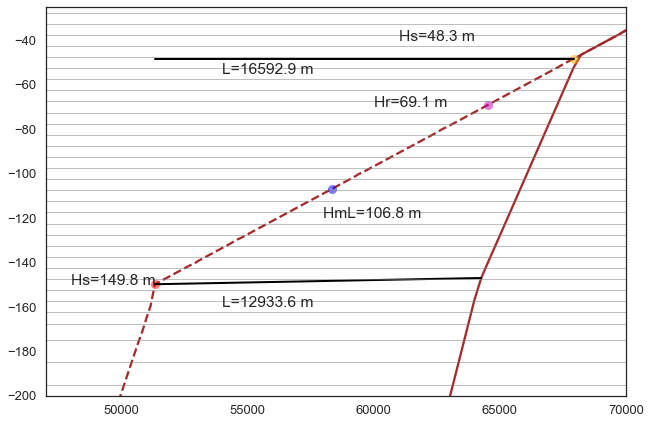

In [29]:
fig, ax = plt.subplots(1,1)

# plot canyon axis and shelf
ax.plot(Y,-depth[:,300], color='brown', linestyle='--')
ax.plot(Y,-depth[:,180], color='brown')

# Shelf break depth
ax.plot(Y[225],-depth[225,300],'ro', alpha=0.5)
print('shelf break depth is %1.1f m' %depth[225,300])
ax.text(48000,-150,'Hs=%1.1f m' %(depth[225,300]))

# Head depth
ax.plot(Y[300],-depth[300,300],'o', color='orange', alpha=0.5)
print('head depth is %1.1f m' %depth[300,300])
ax.text(61000,-40,'Hs=%1.1f m' %(depth[300,300]))

# rim depth at UwH
ax.plot(Y[288],-depth[288,300],'mo', alpha=0.5)
print('rim depth at station UwH is %1.1f m' %depth[288,300])
ax.text(60000,-70,'Hr=%1.1f m' %(depth[288,300]))

# mid length depth
ax.plot(Y[262],-depth[262,300],'bo', alpha=0.5)
print('rim depth at mid length is %1.1f m' %depth[262,300])
ax.text(58000,-120,'HmL=%1.1f m' %(depth[262,300]))

# L
plt.plot([Y[300],Y[225]],[-depth[300,300],-depth[300,300]], linewidth=2, color='k')
print('Big L is %1.1f m' %(Y[300]-Y[225]))
ax.text(54000,-55,'L=%1.1f m' %(Y[300]-Y[225]))

# Short L
plt.plot([Y[287],Y[225]],[-depth[287,180],-depth[225,300]], linewidth=2, color='k')
print('L is %1.1f m' %(Y[287]-Y[225]))
ax.text(54000,-160,'L=%1.1f m' %(Y[287]-Y[225]))

# depth levels
for zz in range(len(RC)):
    ax.axhline(RC[zz], color='0.5', linewidth=0.5)

ax.set_ylim(-200,-25)
ax.set_xlim(47000,70000)

slope = (-depth[225,400]+depth[269,400])/(Y[225]-Y[269])
print('slope = (%1.2f + %1.2f) / (%1.2f - %1.2f) = %1.2f' %(-depth[225,400],depth[269,400],Y[225],Y[269], slope) )

Width at rim depth at mid length is 22044.8 m
Width at sb depth at mid length is 12310.3 m
Width at sb depth at mouth is 28079.4 m
L is 16592.9 m


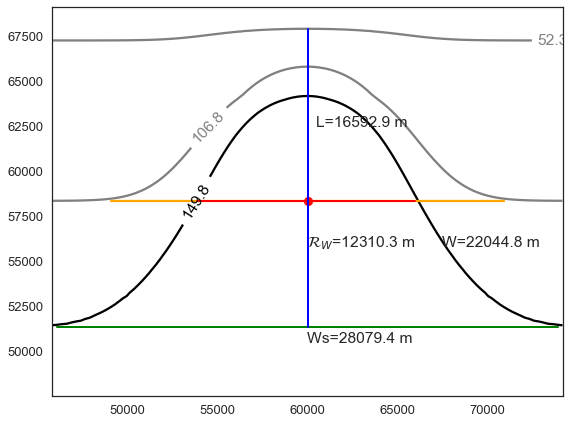

In [44]:
fig, ax = plt.subplots(1,1)

CS = ax.contour(X[100:260],Y[200:305],depth[200:305,100:260], levels=[depth[300,180], depth[262,300] , 149.8], colors=['0.5','0.5','k'])
ax.clabel(CS, fmt='%1.1f')
ax.plot(X[180],Y[262],'or')

ax.plot(X[113:247],np.ones(len(X[113:247]))*Y[262],'-', color='orange')
print('Width at rim depth at mid length is %1.1f m' %(-X[113]+X[247]))
ax.text(67500,55800,'W=%1.1f m' %(-X[113]+X[247]))

ax.plot(X[137:222],np.ones(len(X[137:222]))*Y[262],'-r', linewidth=2)
print('Width at sb depth at mid length is %1.1f m' %(-X[137]+X[222]))
ax.text(60000,55800,r'$\mathcal{R}_W$=%1.1f m' %(-X[137]+X[222]))

ax.plot(X[101:259],np.ones(len(X[101:259]))*Y[225],'-g', linewidth=2)
print('Width at sb depth at mouth is %1.1f m' %(-X[101]+X[259]))
ax.text(60000,50500,'Ws=%1.1f m' %(-X[101]+X[259]))

ax.plot(np.ones(len(Y[225:301]))*X[180], Y[225:301],'-b', linewidth=2)
print('L is %1.1f m' %(Y[300]-Y[225]))
ax.text(60500,62500,'L=%1.1f m' %(Y[300]-Y[225]))

ax.set_aspect(1)

### LONGER_CNY2

shelf break depthLon2 is 149.8 m
head depthLon2 is 73.9 m
rim depthLon2 at station UwH is 89.1 m
rim depthLon2 at mid length is 115.7 m
Big L is 12407.7 m
L is 9694.8 m
slope = (-149.82 + 97.46) / (51333.64 - 59888.45) = 0.01


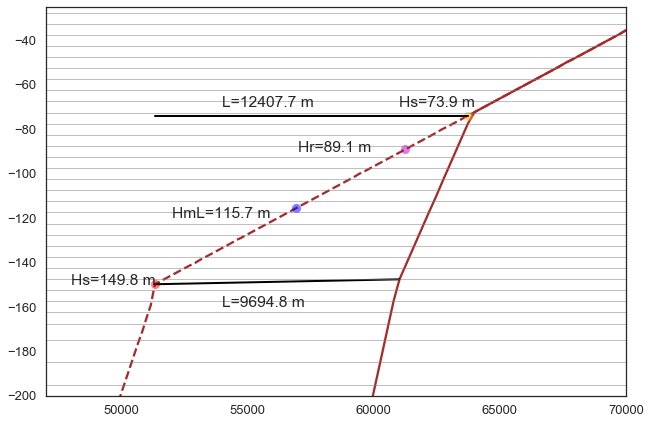

In [78]:
fig, ax = plt.subplots(1,1)

# plot canyon axis and shelf
ax.plot(Y,-depthLon2[:,300], color='brown', linestyle='--')
ax.plot(Y,-depthLon2[:,180], color='brown')

# Shelf break depthLon2
ax.plot(YLon2[225],-depthLon2[225,300],'ro', alpha=0.5)
print('shelf break depthLon2 is %1.1f m' %depthLon2[225,300])
ax.text(48000,-150,'Hs=%1.1f m' %(depthLon2[225,300]))

# Head depthLon2
ax.plot(YLon2[285],-depthLon2[285,300],'o', color='orange', alpha=0.5)
print('head depthLon2 is %1.1f m' %depthLon2[285,300])
ax.text(61000,-70,'Hs=%1.1f m' %(depthLon2[285,300]))

# rim depthLon2 at UwH
ax.plot(YLon2[275],-depthLon2[275,300],'mo', alpha=0.5)
print('rim depthLon2 at station UwH is %1.1f m' %depthLon2[275,300])
ax.text(57000,-90,'Hr=%1.1f m' %(depthLon2[275,300]))

# mid length depth
ax.plot(YLon2[255],-depthLon2[255,300],'bo', alpha=0.5)
print('rim depthLon2 at mid length is %1.1f m' %depthLon2[255,300])
ax.text(52000,-120,'HmL=%1.1f m' %(depthLon2[255,300]))

# L
plt.plot([YLon2[285],YLon2[225]],[-depthLon2[285,300],-depthLon2[285,300]], linewidth=2, color='k')
print('Big L is %1.1f m' %(Y[285]-Y[225]))
ax.text(54000,-70,'L=%1.1f m' %(Y[285]-Y[225]))

# Short length
plt.plot([YLon2[274],YLon2[225]],[-depthLon2[274,180],-depthLon2[225,300]], linewidth=2, color='k')
print('L is %1.1f m' %(YLon2[274]-YLon2[225]))
ax.text(54000,-160,'L=%1.1f m' %(YLon2[274]-YLon2[225]))

# depthLon2 levels
for zz in range(len(RC)):
    ax.axhline(RC[zz], color='0.5', linewidth=0.5)

ax.set_ylim(-200,-25)
ax.set_xlim(47000,70000)

slope2 = (-depthLon2[225,400]+depthLon2[269,400])/(YLon2[225]-YLon2[269])

print('slope = (%1.2f + %1.2f) / (%1.2f - %1.2f) = %1.2f' %(-depthLon2[225,400],depthLon2[269,400],
                                                            YLon2[225],YLon2[269], slope2) )

Width at rim depth at mid length is 21141.7 m
Width at sb depth at mid length is 11956.6 m
Width at sb depth at mouth is 26473.2 m
L is 12407.7 m


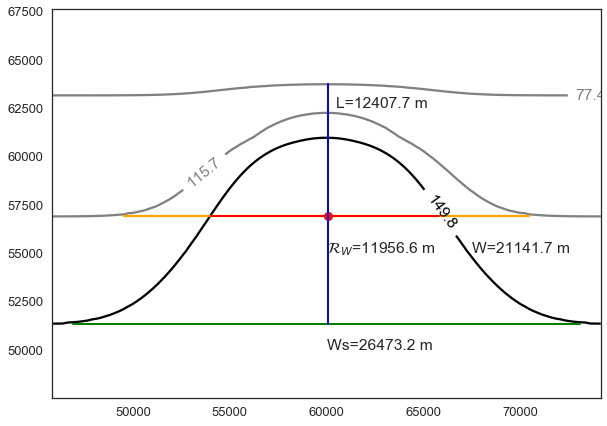

In [88]:
fig, ax = plt.subplots(1,1)
CS = ax.contour(XLon2[100:260],YLon2[200:300],depthLon2[200:300,100:260], levels=[depthLon2[285,180],depthLon2[255,300], 149.8], colors=['0.5','0.5','k'])
ax.clabel(CS, fmt='%1.1f')
ax.plot(XLon2[180],YLon2[255],'or')

ax.plot(XLon2[115:245],np.ones(len(XLon2[115:245]))*YLon2[255],'-', color='orange')
print('Width at rim depth at mid length is %1.1f m' %(-XLon2[115]+XLon2[245]))
ax.text(67500,55000,'W=%1.1f m' %(-XLon2[115]+XLon2[245]))

ax.plot(XLon2[138:221],np.ones(len(XLon2[138:221]))*YLon2[255],'-r', linewidth=2)
print('Width at sb depth at mid length is %1.1f m' %(-XLon2[138]+XLon2[221]))
ax.text(60000,55000,r'$\mathcal{R}_W$=%1.1f m' %(-XLon2[138]+XLon2[221]))

ax.plot(XLon2[104:256],np.ones(len(XLon2[104:256]))*YLon2[225],'-g', linewidth=2)
print('Width at sb depth at mouth is %1.1f m' %(-XLon2[104]+XLon2[256]))
ax.text(60000,50000,'Ws=%1.1f m' %(-XLon2[104]+XLon2[256]))

ax.plot(np.ones(len(YLon2[225:286]))*XLon2[180], YLon2[225:286],'-b', linewidth=2)
print('L is %1.1f m' %(YLon2[285]-YLon2[225]))
ax.text(60500,62500,'L=%1.1f m' %(YLon2[285]-YLon2[225]))

ax.set_aspect(1)

### Widths Comparison

In [89]:
CanyonGridBar='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
CanyonGridBarOut = Dataset(CanyonGridBar)

CanyonStateBar='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc'
CanyonStateBarOut = Dataset(CanyonStateBar)



In [90]:
sb_ind = 29

depthBar = CanyonGridBarOut.variables['Depth'][:]
YBar = CanyonGridBarOut.variables['Y'][:]
XBar = CanyonGridBarOut.variables['X'][:]
RCBar = CanyonGridBarOut.variables['RC'][:]
hFacCBar = CanyonGridBarOut.variables['HFacC'][:]

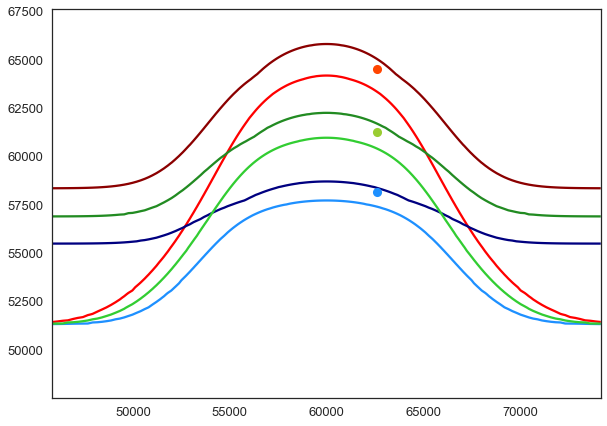

In [91]:
fig, ax = plt.subplots(1,1)

ax.contour(X[100:260],Y[200:300],depth[200:300,100:260], levels=[106.8, 149.8], colors=['darkred','red'])

ax.contour(XBar[100:260],YBar[200:300],depthBar[200:300,100:260], levels=[124.3, 149.8], colors=['navy','dodgerblue'])

ax.contour(XLon2[100:260],YLon2[200:300],depthLon2[200:300,100:260], levels=[115.7, 149.8], colors=['forestgreen','limegreen'])

ax.plot(XBar[200],YBar[261],'o', color='dodgerblue')
ax.plot(X[200],Y[288],'o', color='orangered')
ax.plot(X[200],Y[275],'o', color='yellowgreen')


ax.set_aspect(1)

Dots are located at station UwH for each bathymetry. Darker lines correspond to the rim depth isobath at mid-length and lighter lines correspond to the shelf-break depth isobath.

### Radius of curvature

get land mask
find first land starting point from deep ocean at sb depth for each alongshore point to get x,y location of sb isobath
calculate radius of curvature

In [15]:
grid_file = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'

with Dataset(grid_file, 'r') as nbl:
    Z = nbl.variables['RC'][:]
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
    hFacC = nbl.variables['HFacC'][:]
    rA = nbl.variables['rA'][:]
    Depth = nbl.variables['Depth'][:]

hfac = np.ma.masked_values(hFacC, 0)
maskC = np.ma.getmask(hfac)

In [16]:
X_small = X[90:270]
Y_small = Y[200:300]
Depth_small = Depth[200:300, 90:270]
sb_ind = np.argmin(hFacC[29, 200:300, 90:270], axis = 0)


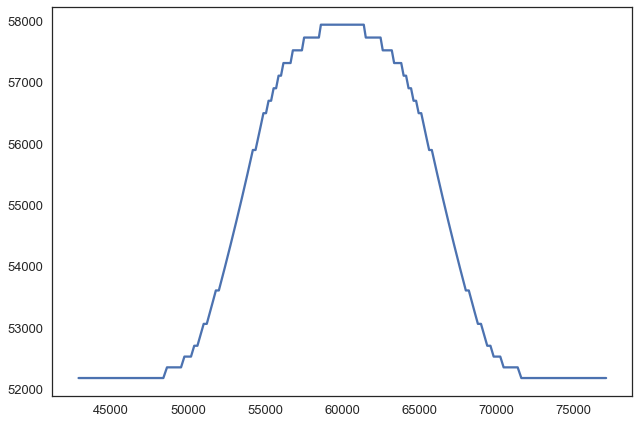

In [17]:
sb_ind
plt.plot(X_small, Y_small[sb_ind])


In [18]:
dif = (Y_small[sb_ind[0:-1]]-Y_small[sb_ind[1:]])/(X_small[0:-1]-X_small[1:])

diff = (Y_small[sb_ind[0:-2]]-2*Y_small[sb_ind[1:-1]]+Y_small[sb_ind[2:]])(X_small[0:-2]-)


/(X_small[0:-1]-X_small[1:])
curv = ((1+(Y_small[sb_ind[0:-1]]-Y_small[sb_ind[1:]])/(X_small[0:-1]-X_small[1:])**2)**1.5)/()

SyntaxError: invalid syntax (<ipython-input-18-aa5929747bf3>, line 3)